In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

data = pd.read_csv("/home/rajatraj/Downloads/Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
data.shape

(200, 5)

In [18]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [21]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [22]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
le = LabelEncoder()
data['Genre']=le.fit_transform(data['Genre'])

In [25]:
X= data[['Genre','Age', 'Annual Income (k$)','Spending Score (1-100)']]

scaler= StandardScaler()

x_scale=scaler.fit_transform(X)

In [27]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


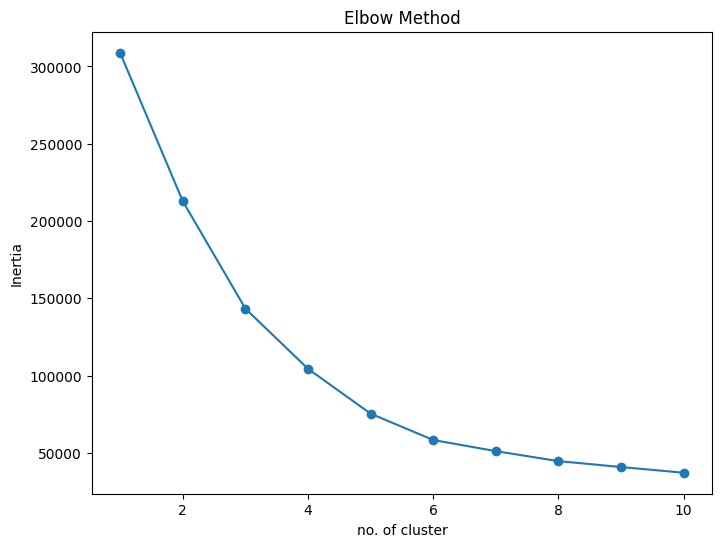

In [34]:
inertia=[]

for i in range (1,11):
    kmean=KMeans(n_clusters=i,n_init=10,random_state=42)
    kmean.fit(X)
    inertia.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel('no. of cluster')
plt.ylabel('Inertia')
plt.show()

In [35]:
k = 5

kmean=KMeans(n_clusters=k,n_init=10,random_state=42)

cluster= kmean.fit_predict(X)
data['cluster']=cluster


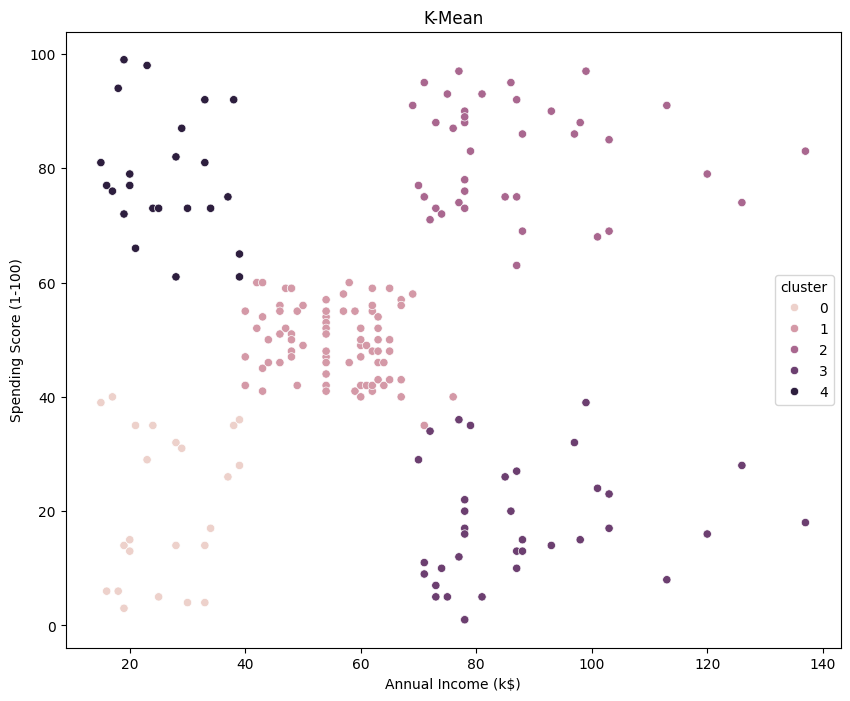

In [40]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)',y = 'Spending Score (1-100)',hue='cluster' , data= data)
plt.title('K-Mean')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

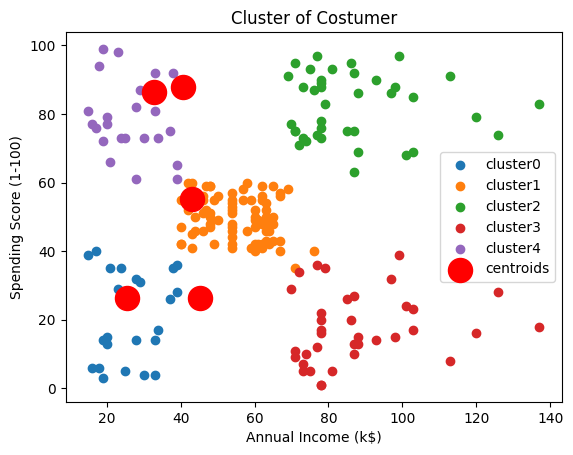

In [41]:
for i in range(k):
    cluster_data=data[data['cluster']==i]
    plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],label=f'cluster{i}')

plt.scatter(kmean.cluster_centers_[:,1],kmean.cluster_centers_[:,2],s=300,c='red',label='centroids')
plt.title('Cluster of Costumer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
